![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

**Read `Salaries.csv` as a dataframe called `sal`.**

In [3]:
# link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
url='https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv'
sal = pd.read_csv(url,sep=",") # use sep="," for coma separation. 

**Check the head of the DataFrame.**

In [4]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [6]:
sal.BasePay.mean()

66325.4488404877

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [7]:
sal.BasePay.min()

-166.01

In [8]:
sal.BasePay.max()

319275.01

**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [9]:
print('info:\n',sal.OvertimePay.describe())
print('average:', sal.OvertimePay.mean())
print('min:',sal.OvertimePay.min())
print('max:',sal.OvertimePay.max())


info:
 count    148650.000000
mean       5066.059886
std       11454.380559
min          -0.010000
25%           0.000000
50%           0.000000
75%        4658.175000
max      245131.880000
Name: OvertimePay, dtype: float64
average: 5066.059886444667
min: -0.01
max: 245131.88


**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [10]:
#To select rows whose column value equals a scalar, some_value, use ==:
sal.loc[sal['EmployeeName'] == 'JOSEPH DRISCOLL'].JobTitle

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

In [11]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here
sal.loc[sal['EmployeeName'] == 'GARY JIMENEZ']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [12]:
sal.loc[sal['EmployeeName'] == 'JOSEPH DRISCOLL',['TotalPay','Benefits']]
# sal.Benefits.unique()

,TotalPay,Benefits
24,270324.91,NaN


**What is the name of highest paid person (including benefits)?**

In [13]:
sal.loc[sal['TotalPay']==sal['TotalPay'].max(),['EmployeeName','TotalPay','Benefits']]
# sal['TotalPay'].max()

,EmployeeName,TotalPay,Benefits
0,NATHANIEL FORD,567595.43,NaN


**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [14]:
sal.loc[sal['TotalPay']==sal['TotalPay'].min(),['EmployeeName','TotalPay','Benefits']]
#Số tiền được trả của anh ta là một số âm

,EmployeeName,TotalPay,Benefits
148653,Joe Lopez,-618.13,0.0


**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [15]:
sal.groupby('Year')['BasePay'].mean()


Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [16]:
fre=sal['JobTitle'].value_counts()
fre

Transit Operator                              7036
Special Nurse                                 4389
Registered Nurse                              3736
Public Svc Aide-Public Works                  2518
Police Officer 3                              2421
Custodian                                     2418
TRANSIT OPERATOR                              2388
Firefighter                                   2359
Recreation Leader                             1971
Patient Care Assistant                        1945
Deputy Sheriff                                1933
Police Officer                                1476
SPECIAL NURSE                                 1402
Public Service Trainee                        1328
REGISTERED NURSE                              1219
Police Officer 2                              1141
Attorney (Civil/Criminal)                     1126
Porter                                        1095
Sergeant 3                                    1047
General Laborer                

**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [17]:
fre.head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [39]:
salYear=sal.groupby('Year')
for name,group in salYear:
    if name==2013:
        onlyPerson=group.JobTitle.value_counts()
#         print(onlyPerson.index)
        for i in range(len(onlyPerson)):
            if onlyPerson.index[i]=='Chief':
                print(onlyPerson.index[i],'---',onlyPerson[i])
#         if onlyPerson==1:
#             print()
              

    

**How many people have the word Chief in their job title?**

In [44]:
count=0
for i in range(len(sal.JobTitle)):
    if sal.JobTitle[i].find('Chief')!=-1 or sal.JobTitle[i].find('CHIEF')!=-1:
        count=count+1
        
print(count)

627


## Data Visualization

**Implement seaborn's countplot with x='Year'**

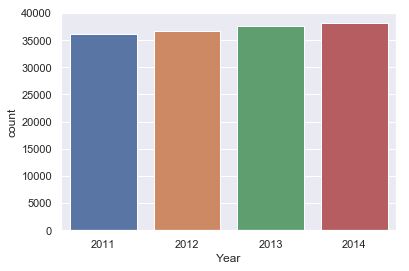

In [50]:
sns.set(style="darkgrid")
# titanic = sns.load_dataset("titanic")
ax=sns.countplot(x="Year",data=sal)

**Implement seaborn's distplot for BasePay of Year 2011**

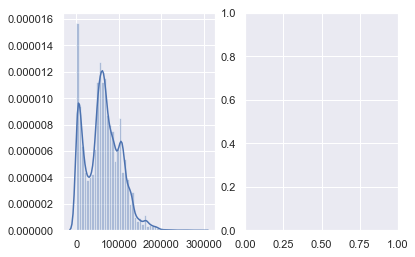

In [66]:
import matplotlib.pyplot as plt

basePay2011=sal.loc[sal['Year'] ==2011,['BasePay']].dropna()
sns.distplot(basePay2011,kde=False)
plt.show()

**How about other Year**

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

# Great Job!